In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os

In [2]:
x = input('Laptop ? [y/n]')
if x == 'n':
    path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df=pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')
else:
    path = 'C:\\Users\\Nico Janko\\Documents\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df = pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')

Laptop ? [y/n] y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
df['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [5]:
df['product_category_0'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0])
print(df['product_category_0'].unique().shape[0])
df['product_category_1'] = df['product_category_tree'].apply(lambda x: x.split('>>')[1])
print(df['product_category_1'].unique().shape[0])

7
63


# Text

In [6]:
txt_df = df.iloc[:, [0, 10, 15, 16]]

<AxesSubplot:>

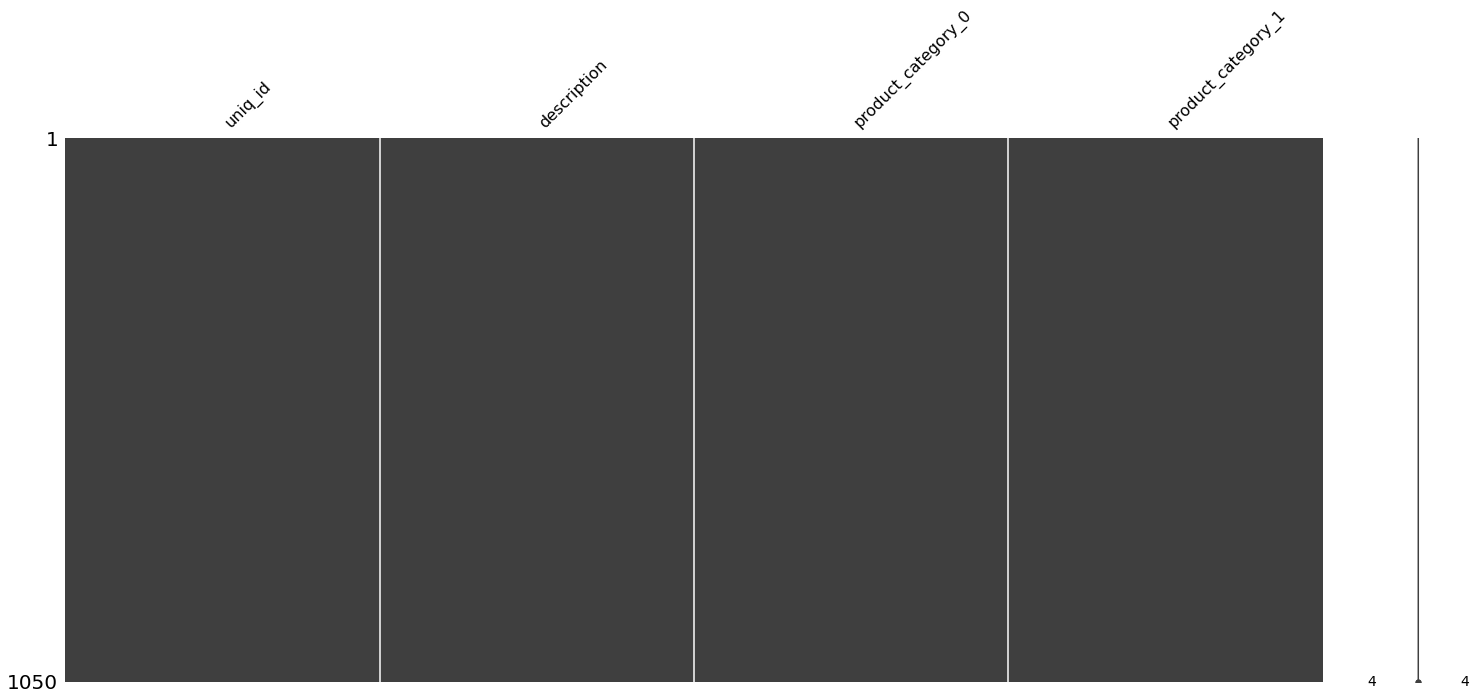

In [7]:
msno.matrix(txt_df)

C:\Users\Nico Janko\AppData\Local\Temp\ipykernel_16048\1234230903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt_df['lenght'] = txt_df['description'].apply(lambda x: len(x))


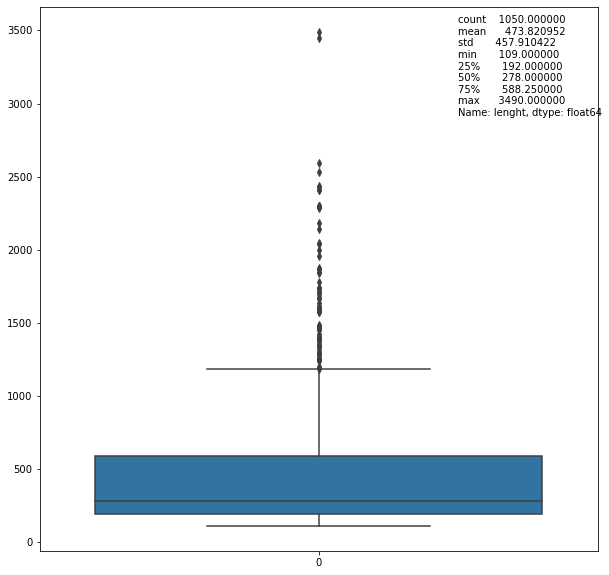

In [8]:
txt_df['lenght'] = txt_df['description'].apply(lambda x: len(x))
txt_df['lenght'].describe()
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [9]:
out = []
q1 = txt_df['lenght'].quantile(0.25)
q3 = txt_df['lenght'].quantile(0.75)
interq = q3-q1
out = txt_df.loc[(txt_df['lenght'] < (q1-1.5*interq)) | (txt_df['lenght'] > (q3+1.5*interq))]
print(out.shape[0], out.shape[0]/txt_df.shape[0]*100)
out.sort_values(by='lenght', ascending = False).iloc[1, 1]

85 8.095238095238095


'Key Features of Sunlast 16 inch Laptop Backpack Laptop Backpack with solar panel Comfortable back panel with air-flow design Adjustable sternum strap Large outer elasticated mesh side pocket and a top carry handle Padded and Adjustable shoulder straps Charge your mobile by solar power Mobile power backup option Long life Easy to use,Sunlast 16 inch Laptop Backpack (Yellow) Price: Rs. 2,348 The Sunlast New Laptop Backpack with Solar Panel ensures complete safety to your laptop with its high-quality built and wide range of built-in features. With the inside of this bag featuring a protective padding, you can be rest assured that the laptop inside it will be well cushioned from any accidental damage caused when you bump into any surface. As it is made of nylon, this laptop backpack can withstand abrasions and is long lasting. This Sunlast Backpack comes with a unique solar panel which allows you to charge your mobile phone anywhere anytime. This Sunlast Laptop backpack with solar panel i

## Preprocessing

In [12]:
import nltk 
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\Nico
[nltk_data]     Janko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Nico
[nltk_data]     Janko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Nico
[nltk_data]     Janko\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nico
[nltk_data]     Janko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Nico
[nltk_data]     Janko\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
words = set(nltk.corpus.words.words())
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

def prepro(x):
    prepro_list = []
    for sentence in x:
        sent_wo_punc = "".join([i.lower() for i in sentence if i not in string.punctuation])
        sent_wo_num = ''.join([i for i in sent_wo_punc if not i.isdigit()])
        sent_token = nltk.tokenize.word_tokenize(sent_wo_num)
        token_wo_stop = [i for i in sent_token if i not in stopwords]
        lem = (lemmatizer.lemmatize(i) for i in token_wo_stop if i not in string.punctuation)
        clean = ' '.join(i for i in lem if i.lower() in words or not i.isalpha())
        prepro_list.append(clean)
    return prepro_list

C:\Users\Nico Janko\AppData\Local\Temp\ipykernel_16048\1237448406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt_df['description_clean'] = prepro(txt_df['description'])
C:\Users\Nico Janko\AppData\Local\Temp\ipykernel_16048\1237448406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt_df['lenght_clean'] = txt_df['description_clean'].apply(lambda x: len(x))


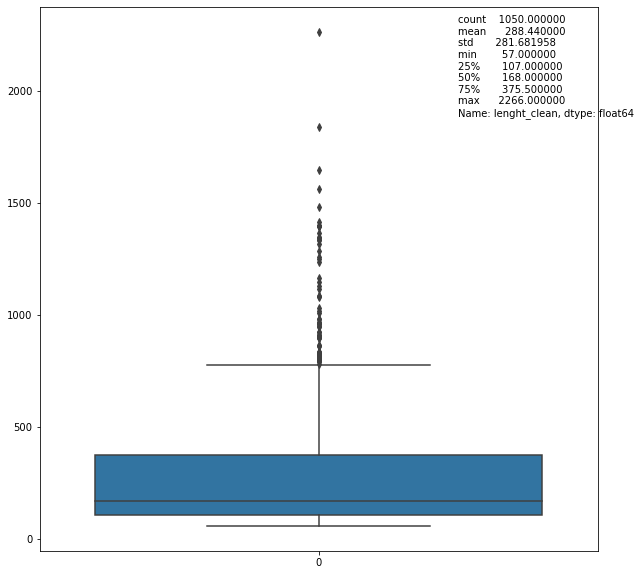

In [14]:
txt_df['description_clean'] = prepro(txt_df['description'])
txt_df['lenght_clean'] = txt_df['description_clean'].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght_clean'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght_clean'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
txt_df['labels_0'] = le.fit_transform(txt_df['product_category_0'])
txt_df['labels_1'] = le.fit_transform(txt_df['product_category_1'])

C:\Users\Nico Janko\AppData\Local\Temp\ipykernel_16048\1774561472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt_df['labels_0'] = le.fit_transform(txt_df['product_category_0'])
C:\Users\Nico Janko\AppData\Local\Temp\ipykernel_16048\1774561472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt_df['labels_1'] = le.fit_transform(txt_df['product_category_1'])


### Bag of Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())

In [17]:
from sklearn import cluster, metrics
clus = cluster.KMeans(n_clusters = 7, random_state = 38)
clus1 = cluster.KMeans(n_clusters = 63, random_state = 38)
clus.fit(bag_of_words)
clus1.fit(bag_of_words)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.05511836832302885 for categorie 0 and 0.162601697892364 for categorie 1.


### Tf-Idf

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
clus.fit(tf_idf_matrix)
clus1.fit(tf_idf_matrix)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.2507688191993226 for categorie 0 and 0.31817724778221507 for categorie 1.


#### n-gram

In [19]:
# Bag of words
for i in range(1, 6):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(i, i))
    bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(bag_of_words)
    clus1.fit(bag_of_words)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))


The ari scores for the 1-gram are 0.05511836832302885 for categorie 0 and 0.162601697892364 for categorie 1.
The ari scores for the 2-gram are 0.11123097599456164 for categorie 0 and 0.2790074147919719 for categorie 1.
The ari scores for the 3-gram are 0.10721369569826789 for categorie 0 and 0.18973218557512436 for categorie 1.
The ari scores for the 4-gram are 0.15457595142062325 for categorie 0 and 0.1937354240944034 for categorie 1.
The ari scores for the 5-gram are 0.0036007115182126567 for categorie 0 and 0.19191339124116563 for categorie 1.


In [20]:
# tf-idf
for i in range(1,6):
    tf_idf_vect = TfidfVectorizer(stop_words='english', ngram_range=(i, i))
    tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(tf_idf_matrix)
    clus1.fit(tf_idf_matrix)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))

The ari scores for the 1-gram are 0.2507688191993226 for categorie 0 and 0.31817724778221507 for categorie 1.
The ari scores for the 2-gram are 0.20352584327749396 for categorie 0 and 0.2056563170572055 for categorie 1.
The ari scores for the 3-gram are 0.25953900486782966 for categorie 0 and 0.1518246698125832 for categorie 1.
The ari scores for the 4-gram are 0.12926705491921595 for categorie 0 and 0.14713439853741356 for categorie 1.
The ari scores for the 5-gram are 0.13884639968902068 for categorie 0 and 0.1567831353066159 for categorie 1.


In [21]:
txt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   uniq_id             1050 non-null   object
 1   description         1050 non-null   object
 2   product_category_0  1050 non-null   object
 3   product_category_1  1050 non-null   object
 4   lenght              1050 non-null   int64 
 5   description_clean   1050 non-null   object
 6   lenght_clean        1050 non-null   int64 
 7   labels_0            1050 non-null   int32 
 8   labels_1            1050 non-null   int32 
dtypes: int32(2), int64(2), object(5)
memory usage: 65.8+ KB


## Word2Vec

In [22]:
txt_df['description_token'] = txt_df['description_clean'].apply(lambda x: nltk.tokenize.word_tokenize(x))

C:\Users\Nico Janko\AppData\Local\Temp\ipykernel_16048\448320101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt_df['description_token'] = txt_df['description_clean'].apply(lambda x: nltk.tokenize.word_tokenize(x))


In [23]:
exmpl = txt_df.iloc[2, -2]

In [24]:
from gensim.models import Word2Vec
model = Word2Vec(vector_size = 300)
model.build_vocab(txt_df['description_token'].tolist())
model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=35)

(1146285, 1607375)

In [25]:
model.corpus_count

1050

In [26]:
vector = model.wv

In [27]:
vector.most_similar("natural")

[('vibrantly', 0.773703932762146),
 ('bathing', 0.756912350654602),
 ('bar', 0.7339965105056763),
 ('smooth', 0.722379744052887),
 ('shampoo', 0.7198173403739929),
 ('conditioner', 0.7023827433586121),
 ('cream', 0.6971898674964905),
 ('essential', 0.6925555467605591),
 ('smoothing', 0.685917854309082),
 ('intense', 0.6685445308685303)]

In [28]:
vector.most_similar('computer')

[('vacuum', 0.9353179931640625),
 ('cleaner', 0.8688734173774719),
 ('connect', 0.8615784645080566),
 ('working', 0.8473386168479919),
 ('cleaning', 0.8294679522514343),
 ('attachment', 0.812099039554596),
 ('powered', 0.7956953644752502),
 ('keyboard', 0.7951917052268982),
 ('air', 0.7941943407058716),
 ('simply', 0.7933605909347534)]

In [29]:
def get_mean(vectors, document):
    # check if each token is in the vocab (min =5)
    doc = [i for i in document if i in vectors.index_to_key]
    mean = np.mean(vectors[doc], axis = 0)
    return mean

In [30]:
txt_df['embeded_doc'] = txt_df['description_token'].apply(lambda x: get_mean(vector, x))

C:\Users\Nico Janko\AppData\Local\Temp\ipykernel_16048\3813552275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  txt_df['embeded_doc'] = txt_df['description_token'].apply(lambda x: get_mean(vector, x))


In [31]:
embeded_doc = pd.DataFrame(txt_df['embeded_doc'].tolist())
clus.fit(embeded_doc)
clus1.fit(embeded_doc)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.2362761701664067 for categorie 0 and 0.3722764807859608 for categorie 1.


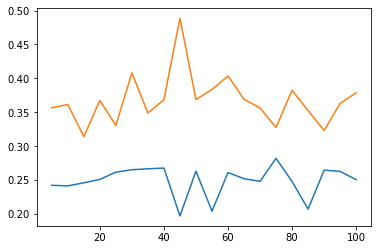

In [32]:
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=i)
    vector = model.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()    

### n-gram

In [34]:
from gensim.models import phrases

In [35]:
bigrams = phrases.Phrases(txt_df['description_token'], threshold=10.0)
model2 = Word2Vec(bigrams[txt_df['description_token']], vector_size = 300)
model2.train(txt_df['description_token'], total_examples=model2.corpus_count, epochs=model2.epochs)

(165042, 229625)

In [36]:
vector2 = model2.wv
vector2.most_similar('computer')

[('dust', 0.9989303350448608),
 ('device', 0.9989035725593567),
 ('android', 0.9988093376159668),
 ('phone', 0.9987680912017822),
 ('switch', 0.9984315633773804),
 ('connect', 0.998413622379303),
 ('memory', 0.9982918500900269),
 ('prevent', 0.9981983304023743),
 ('within', 0.998160183429718),
 ('displayed', 0.9980607628822327)]

In [37]:
temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
temp = pd.DataFrame(temp.tolist())
clus.fit(temp)
clus1.fit(temp)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.23271655140198574 for categorie 0 and 0.18320021047735627 for categorie 1.


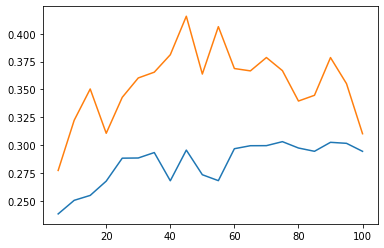

In [38]:
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model2.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector2 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()   

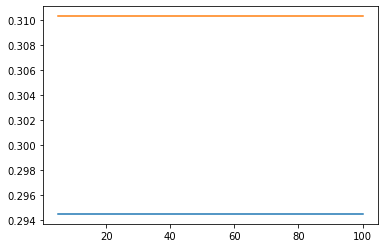

In [39]:
# test with skipgram instead of cbow
model3 = Word2Vec(vector_size = 300,sg =1)
model3.build_vocab(txt_df['description_token'].tolist())
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model3.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector3 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector3, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()

In [41]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [45]:
# need to tagged the documents
tagged_txt = [TaggedDocument(d, [i]) for i, d in enumerate(txt_df['description_token'].tolist())]
model4 = Doc2Vec(tagged_txt, epochs = 100)

In [48]:
model4.infer_vector(['this', 'is', 'test'])

array([-6.6735415e-04,  1.4320528e-03, -4.0076851e-04,  4.7141765e-03,
       -3.9527509e-03,  3.9339093e-03, -4.4249995e-03,  5.3619745e-04,
        3.9196669e-04,  3.8625186e-03, -3.8886518e-04, -2.5310814e-03,
        3.9882744e-03, -4.3188930e-03,  2.5238323e-03, -3.3510777e-03,
       -1.7091865e-03,  6.0882984e-04,  2.7129936e-03,  4.8753233e-03,
        2.6796139e-03,  3.3041596e-04,  4.4857818e-03, -2.6379823e-04,
        3.7211215e-03,  6.4664008e-04,  6.4738153e-04, -1.7541590e-03,
        1.7077089e-04, -8.9292496e-04,  2.0853675e-03, -4.7494825e-03,
        4.6615265e-03, -4.4124238e-03, -2.4753255e-03, -3.6297108e-03,
       -4.5404397e-03, -7.3814095e-05, -4.1538180e-04, -4.4002421e-03,
       -3.6798138e-03, -2.5535761e-03,  2.8524988e-03,  5.6373177e-04,
       -2.4658844e-03, -3.3622610e-03, -2.3956597e-03,  2.0611756e-03,
       -8.2925946e-04,  1.0990363e-03, -3.2565352e-03,  3.9528105e-03,
        1.1773795e-03, -1.2669757e-03, -4.4315290e-03,  3.3407444e-03,
      